In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image

from model import *
from train import *

import os
import shutil
import pickle

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')

device = cpu


# Load pretrained automaton

In [8]:
name = 'bubbles_bias_mean_8000ep'

automaton = CAutomaton(bias=True)
automaton.load_state_dict(torch.load(f'pretrained_automata/{name}_state_dict.pt', map_location=device))

print(automaton)

CAutomaton(
  (perception_filter): Conv2d(12, 48, kernel_size=(3, 3), stride=(1, 1))
  (update_rule): Sequential(
    (0): Conv2d(48, 96, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(96, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)


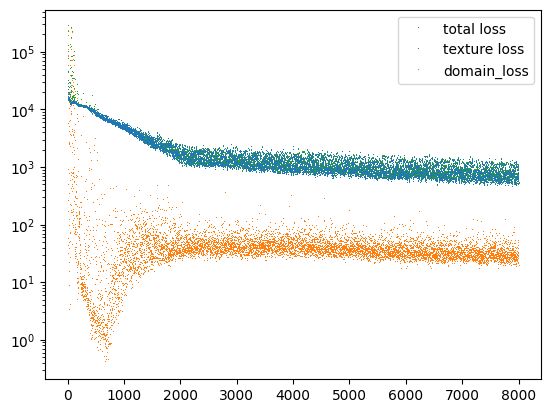

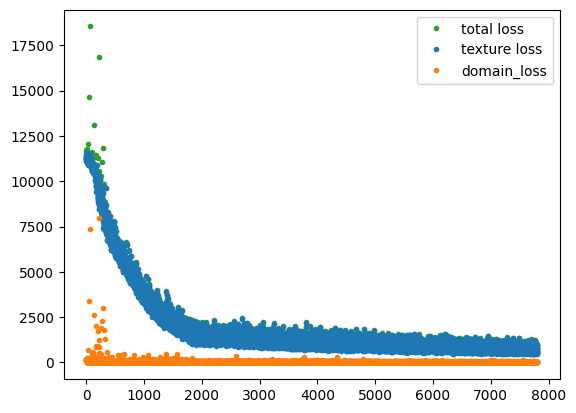

In [12]:
# load loss data

with open(f'pretrained_automata/{name}_tlosses.pickle', 'rb') as f:
    texture_losses = pickle.load(f)
with open(f'pretrained_automata/{name}_dlosses.pickle', 'rb') as f:
    domain_losses = pickle.load(f)
with open(f'pretrained_automata/{name}_losses.pickle', 'rb') as f:
    losses = pickle.load(f)

# plot evolution

plt.semilogy(losses, ',', color='C2', label='total loss')
plt.semilogy(texture_losses, ',', color='C0', label='texture loss')
plt.semilogy(domain_losses, ',', color='C1', label='domain_loss')
plt.legend()
plt.show()

plt.plot(losses[200:], '.', color='C2', label='total loss')
plt.plot(texture_losses[200:], '.', color='C0', label='texture loss')
plt.plot(domain_losses[200:], '.', color='C1', label='domain_loss')
plt.legend()
plt.show()

# Test automaton

In [13]:
size = (256, 256)

from torchvision.utils import save_image

if os.path.exists('outputs'):
    shutil.rmtree('outputs')
    os.mkdir('outputs')
else:
    os.mkdir('outputs')

test_iters = 1000

# iterate automaton from random initial state
with torch.inference_mode():
    states = torch.rand((1, automaton.num_states, *size), device=device)
    for step in range(test_iters):
        states = automaton(states)
        img = states[:, :3, :, :]

        save_image(img[0], f'outputs/epoch_{step:05}.png')


In [14]:
# Make a gif animation
def make_gif(test_iters, name):
    frames = [Image.open(f'outputs/epoch_{iter:05}.png') for iter in range(test_iters)]
    frame_one = frames[0]
    frame_one.save(f"gifs/{name}_evolution.gif", format="GIF", append_images=frames,
               save_all=True, duration=10, loop=0)

make_gif(test_iters, name)

## First order terms?

In [11]:
n = 256

x = torch.linspace(0, 1, n)[None, None, :, None].expand((1, 12, n, n))
y = torch.linspace(0, 1, n)[None, None, None, :].expand((1, 12, n, n))

# for i in range(12):
#     states = torch.zeros(1, 12, n, n)
#     states[:, i, :, :] = x
#     print(automaton(states).mean().item())
# for i in range(12):
#     states = torch.zeros(1, 12, n, n)
#     states[:, i, :, :] = y
#     print(automaton(states).mean().item())

for i in range(50):
    wx, wy, p = torch.rand((12)), torch.rand((12)), torch.rand((12))
    wx = (wx/wx.sum())[None, :, None, None].expand((1, 12, n, n))
    wy = (wy/wy.sum())[None, :, None, None].expand((1, 12, n, n))
    p = p[None, :, None, None].expand((1, 12, n, n))
    states = p*wx*x+(1-p)*wy*y
    #print(automaton(states).max().item())
    print(automaton(states).mean().item())


0.15038439631462097
0.16793039441108704
0.12292469292879105
0.14499913156032562
0.1672365963459015
0.1573767066001892
0.17605258524417877
0.13690274953842163
0.15469583868980408
0.15837451815605164
0.18193678557872772
0.15901422500610352
0.15322677791118622
0.1693786233663559
0.1507030576467514
0.1961698979139328
0.14545050263404846
0.1920175701379776
0.14950157701969147
0.15977762639522552
0.14305156469345093
0.1365378051996231
0.1572771817445755
0.18322119116783142
0.14498987793922424
0.16210855543613434
0.13928371667861938
0.14415858685970306
0.1558518260717392
0.19868236780166626
0.20821434259414673
0.16766972839832306
0.14335066080093384
0.1962263584136963
0.158661350607872
0.16869083046913147
0.16338571906089783
0.16576994955539703
0.14701397716999054
0.148194819688797
0.1728144884109497
0.15159247815608978
0.15092521905899048
0.14847981929779053
0.1436661183834076
0.1543499231338501
0.17367058992385864
0.1298922449350357
0.14614708721637726
0.20392568409442902
